# time-series data

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt

from fbprophet import Prophet
from datetime import datetime

In [2]:
path = "c:/Windows/Fonts/malgun.ttf"
import platform
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')    

plt.rcParams['axes.unicode_minus'] = False

## numpy polyfit regression

In [3]:
pinkwink_web = pd.read_csv('08. PinkWink Web Traffic.csv', 
                                          encoding='utf-8', thousands=',',
                                          names = ['date','hit'], index_col=0)
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


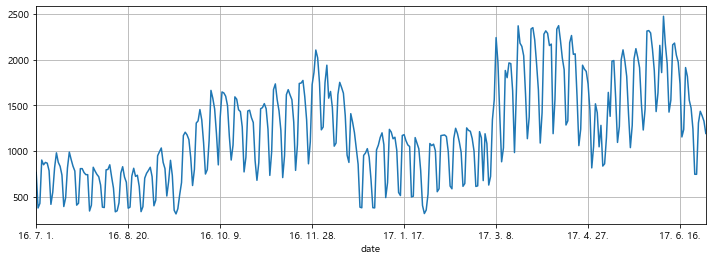

In [4]:
pinkwink_web['hit'].plot(figsize=(12,4), grid=True)

In [5]:
time = np.arange(0, len(pinkwink_web))
traffic = pinkwink_web['hit'].values

fx = np.linspace(0, time[-1], 1000)

In [6]:
def error(f, x, y):
    return np.sqrt(np.mean((f(x)-y)**2))

In [7]:
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)

fp2 = np.polyfit(time, traffic, 2)
f2 = np.poly1d(fp2)

fp3 = np.polyfit(time, traffic, 3)
f3 = np.poly1d(fp3)

fp15 = np.polyfit(time, traffic, 15)
f15 = np.poly1d(fp15)

print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.85973081109626
430.6284101894695
429.53280466762925
330.4777304274343


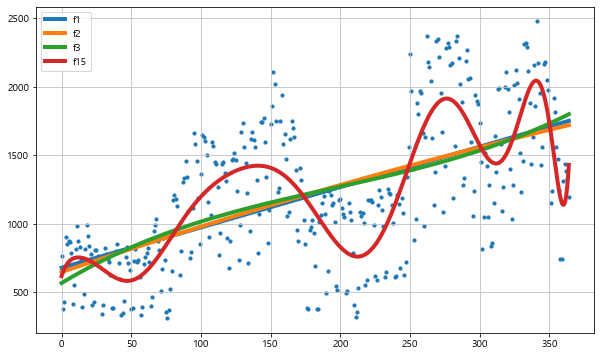

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(time, traffic, s=10)

plt.plot(fx, f1(fx), lw=4, label ='f1')
plt.plot(fx, f2(fx), lw=4, label ='f2')
plt.plot(fx, f3(fx), lw=4, label ='f3')
plt.plot(fx, f15(fx), lw=4, label ='f15')

plt.grid(True, linestyle='-', color='0.75')

plt.legend(loc=2)
plt.show()

## prophet forecast  

In [9]:
df = pd.DataFrame({'ds': pinkwink_web.index, 'y':pinkwink_web['hit']})
df.reset_index(inplace=True)
df['ds'] = pd.to_datetime(df['ds'], format="%y. %m. %d.")
del df['date']

# 주기성이 연단위로 있다고 설정
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [10]:
# 이후 60일간의 데이터를 예측하고 싶다고 명령
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


In [11]:
# 예측한 데이터를 forecast 변수에 저장

forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,911.790860,699.262545,1122.033150
421,2017-08-26,496.917939,295.935621,715.933002
422,2017-08-27,629.458439,420.782674,843.988881
423,2017-08-28,1181.938386,969.786606,1390.493675
424,2017-08-29,1217.864960,1003.929713,1427.363705


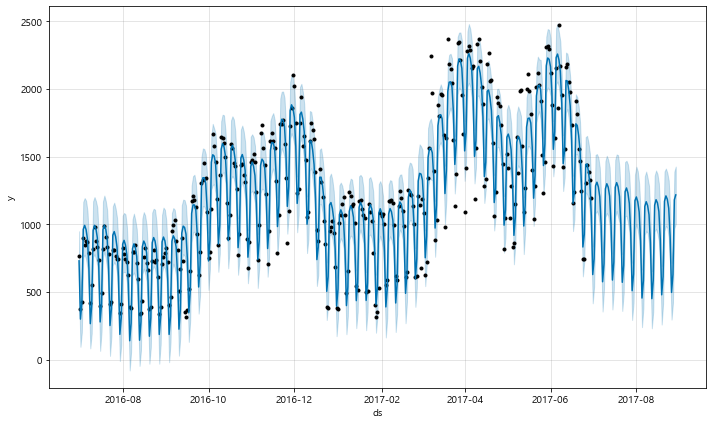

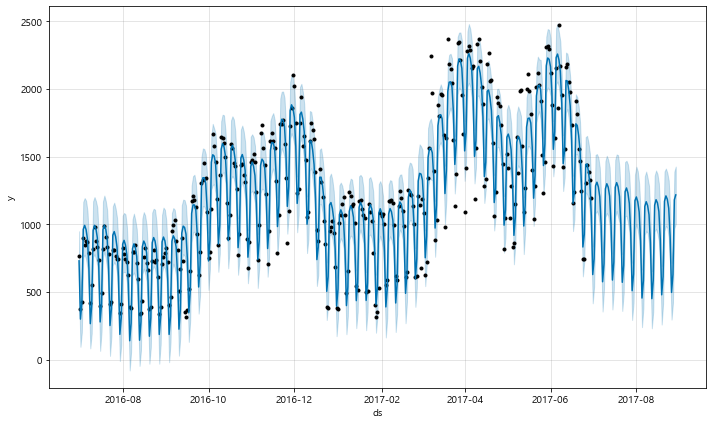

In [12]:
m.plot(forecast)

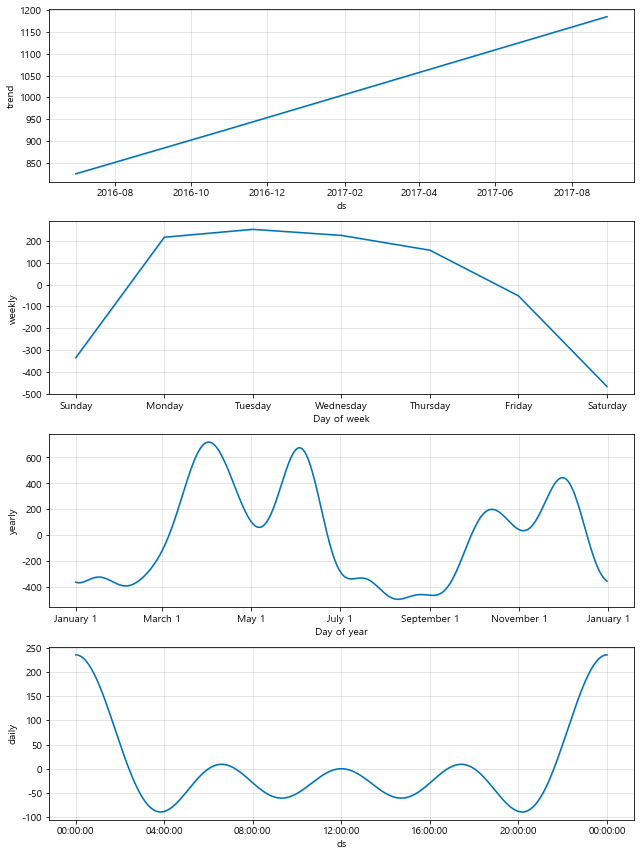

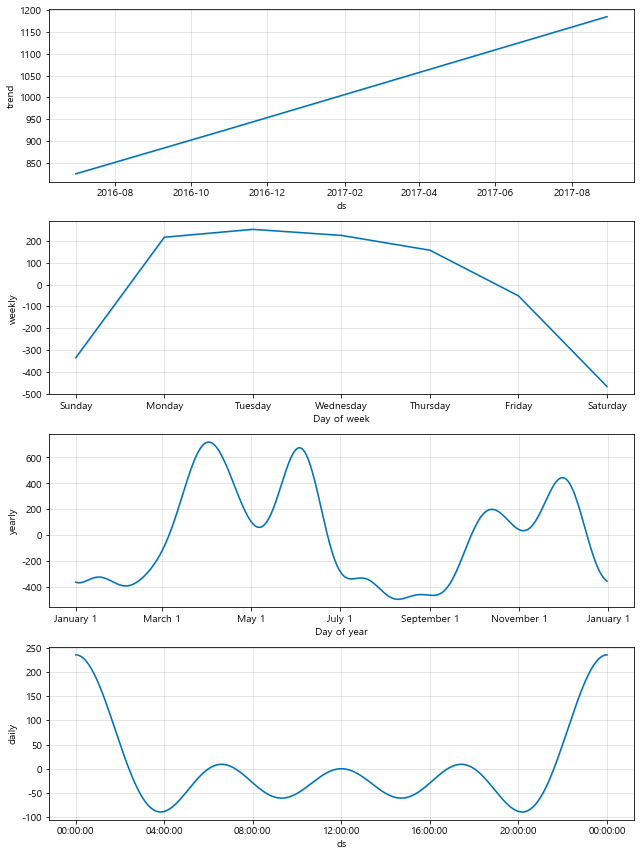

In [13]:
m.plot_components(forecast)

## Seasonal 시계열 분석으로 주식 데이터 분석하기

- DataReader : 판다스에서 제공되는 함수로 구글이 제공하는 주가 정보를 받아올 수 있으나.. 최근 동작이 안됨
- 야후 파이낸스를 통해 데이터 받아오기
- ```pip install yfinance --upgrade --no-cache-dir```
- ```import yfinance as yf```

In [21]:
from pandas_datareader import data
import yfinance as yf
yf.pdr_override()

start_date = '1990-1-1'
end_date = '2017-06-30'
KIA = data.get_data_yahoo('000270.KS', start_date, end_date)
KIA.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,7404.520020,7665.240234,7300.229980,7665.240234,5803.053711,636300
2000-01-05,7404.520020,7404.520020,7248.089844,7248.089844,5487.245605,686100
2000-01-06,7331.520020,7519.240234,6935.220215,6935.220215,5250.383789,379000
2000-01-07,6987.359863,7143.799805,6778.790039,6778.790039,5131.958008,701400
2000-01-10,6841.359863,7102.080078,6810.069824,7091.649902,5368.811523,1076700


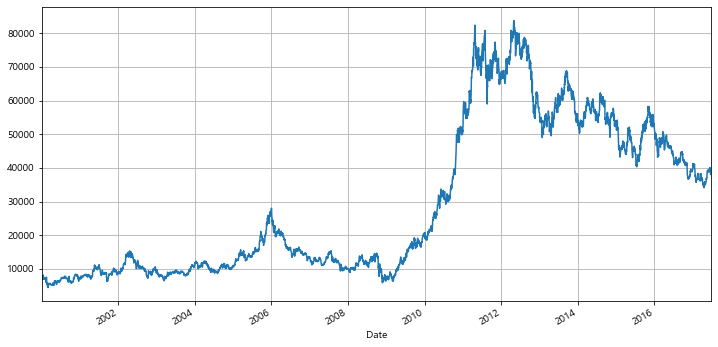

In [23]:
KIA['Close'].plot(figsize=(12,6), grid=True)

In [25]:
# 실제 데이터와 비교를 위해 일부 데이터를 잘라 forecast 수행
KIA_trunc = KIA[:'2016-12-31']
KIA_trunc

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-04,7404.520020,7665.240234,7300.229980,7665.240234,5803.053711,636300
2000-01-05,7404.520020,7404.520020,7248.089844,7248.089844,5487.245605,686100
2000-01-06,7331.520020,7519.240234,6935.220215,6935.220215,5250.383789,379000
2000-01-07,6987.359863,7143.799805,6778.790039,6778.790039,5131.958008,701400
2000-01-10,6841.359863,7102.080078,6810.069824,7091.649902,5368.811523,1076700
...,...,...,...,...,...,...
2016-12-23,38700.000000,39350.000000,38650.000000,39100.000000,36095.636719,1070783
2016-12-26,39100.000000,39350.000000,38850.000000,39000.000000,36003.320312,465612
2016-12-27,39050.000000,39700.000000,39050.000000,39500.000000,36464.902344,879686


In [28]:
# 데이터 프레임 생성

df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2000-01-04,7665.240234
1,2000-01-05,7248.089844
2,2000-01-06,6935.220215
3,2000-01-07,6778.790039
4,2000-01-10,7091.649902


In [30]:
# 1년 후, 2017년 12월 31일까지의 정보를 예측

m = Prophet(daily_seasonality = True)
m.fit(df)

In [31]:
future = m.make_future_dataframe(periods = 365)
future.tail()

,ds
4577,2017-12-25
4578,2017-12-26
4579,2017-12-27
4580,2017-12-28
4581,2017-12-29


In [32]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4577,2017-12-25,35568.216165,26063.141027,44481.411503
4578,2017-12-26,35612.791747,26479.039605,44771.084855
4579,2017-12-27,35583.024559,26217.635365,44415.694139
4580,2017-12-28,35549.068805,26465.065508,44540.113714
4581,2017-12-29,35484.846425,26445.663483,44047.546629


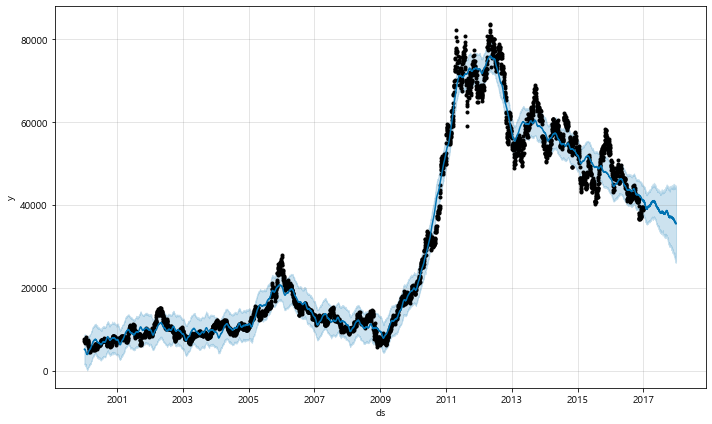

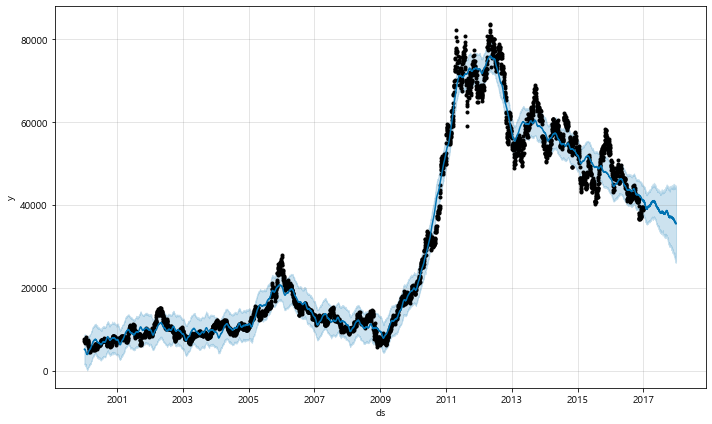

In [33]:
m.plot(forecast)

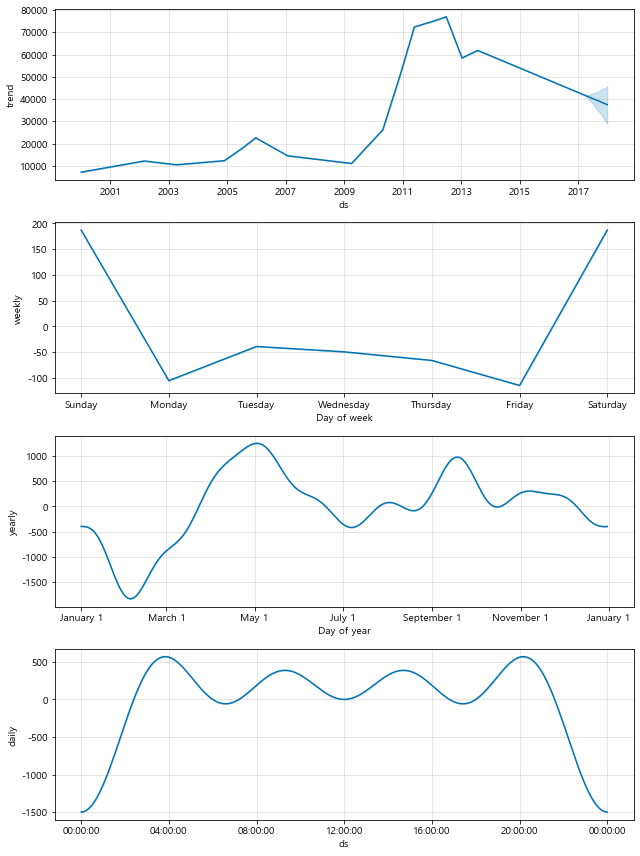

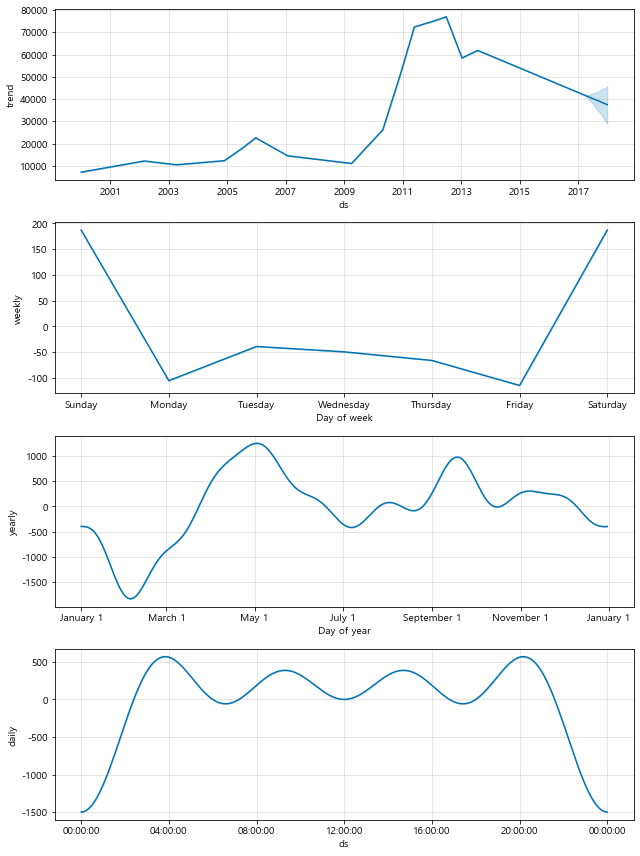

In [34]:
m.plot_components(forecast)

[*********************100%***********************]  1 of 1 completed


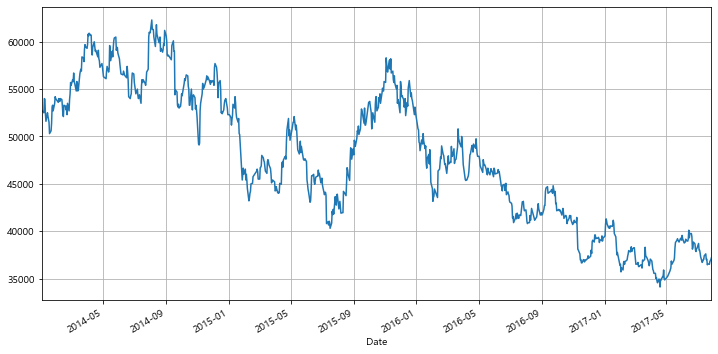

In [46]:
# 테스트 2
start_date = '2014-1-1' 
end_date = '2017-7-31' 
KIA = data.get_data_yahoo('000270.KS', start_date, end_date)
KIA['Close'].plot(figsize=(12,6), grid=True);

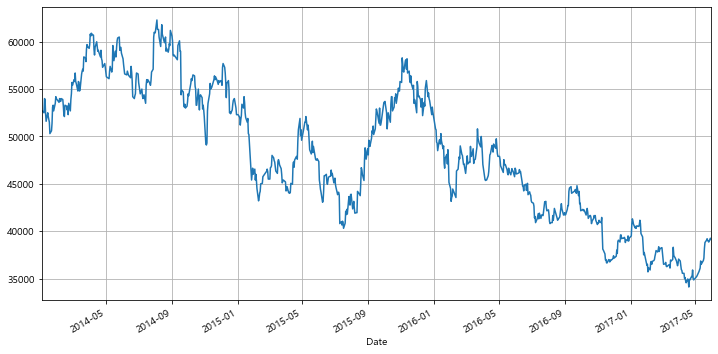

In [47]:
KIA_trunc = KIA[:'2017-05-31']
KIA_trunc['Close'].plot(figsize=(12,6), grid=True)

In [48]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']

In [49]:
m = Prophet(daily_seasonality=True)
m.fit(df)

In [50]:
# 24시간 이후의 결과를 예측할 경우, periods = 24, freq='H' 로 옵션 설정
# 갑작스런 데이터의 변동이 없는 상황에서는 실제 데이터와 아주 근접한 예측 결과를 보여 줌
future = m.make_future_dataframe(periods=61)
future.tail()

,ds
897,2017-07-27
898,2017-07-28
899,2017-07-29
900,2017-07-30
901,2017-07-31


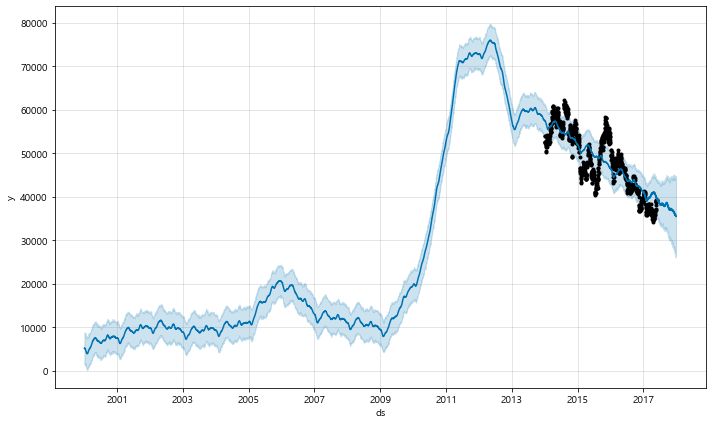

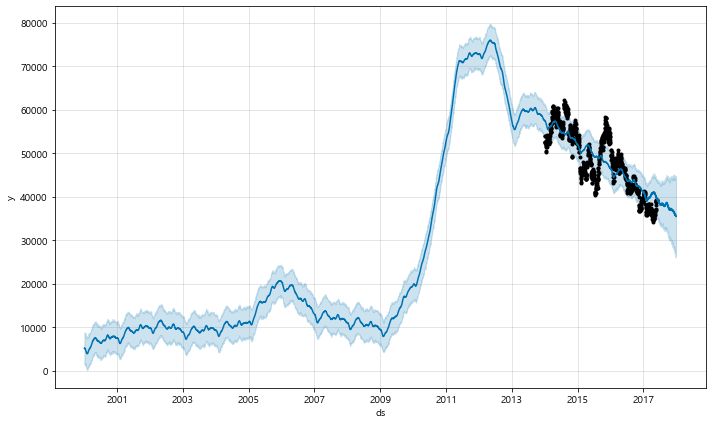

In [41]:
m.forecast = m.predict(future)
m.plot(forecast)

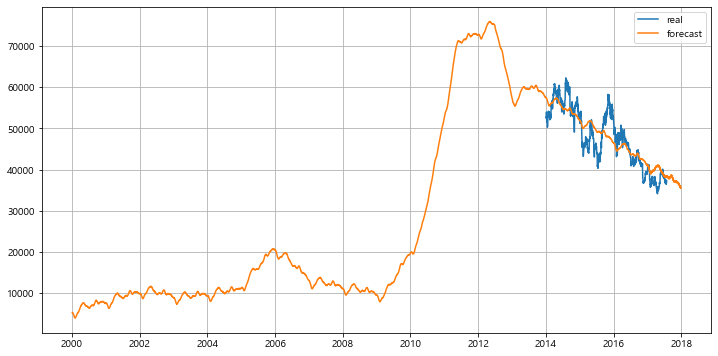

In [51]:
# 실제 값과 예측값 동시 비교

plt.figure(figsize=(12,6))
plt.plot(KIA.index, KIA['Close'], label ='real')
plt.plot(forecast['ds'], forecast['yhat'], label='forecast')
plt.grid()
plt.legend()
plt.show()

## Growth Model과 Holiday Forecast
- prophet 튜토리얼 예제

In [52]:
df = pd.read_csv("08. example_wp_R.csv")
df['y'] = np.log(df['y'])

In [53]:
df['cap'] = 8.5

In [54]:
m = Prophet(growth = 'logistic', daily_seasonality=True)
m.fit(df)

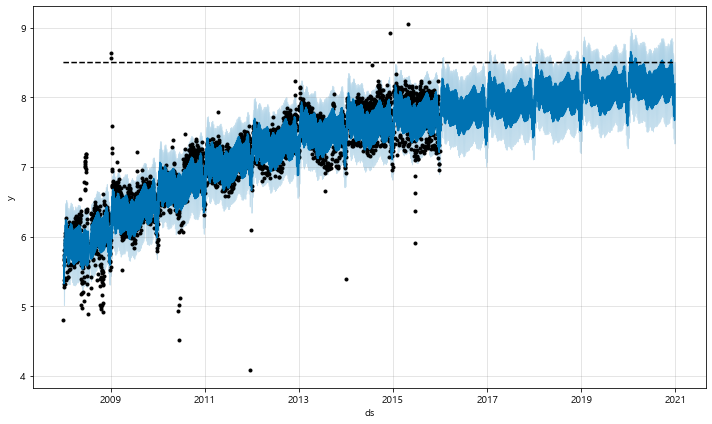

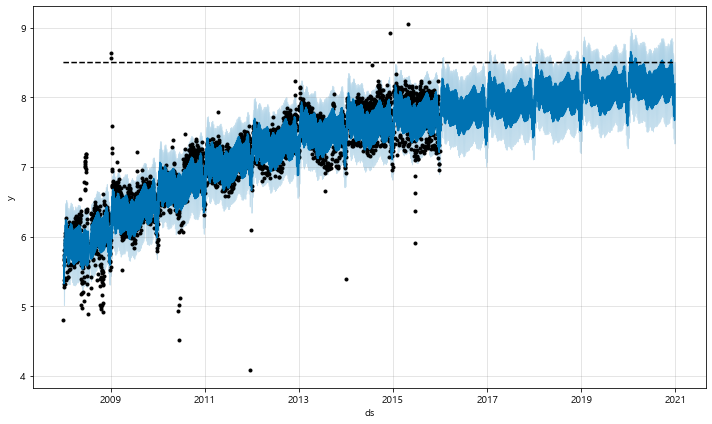

In [55]:
future = m.make_future_dataframe(periods = 1826)
future['cap'] = 8.5
fcst = m.predict(future)
m.plot(fcst)

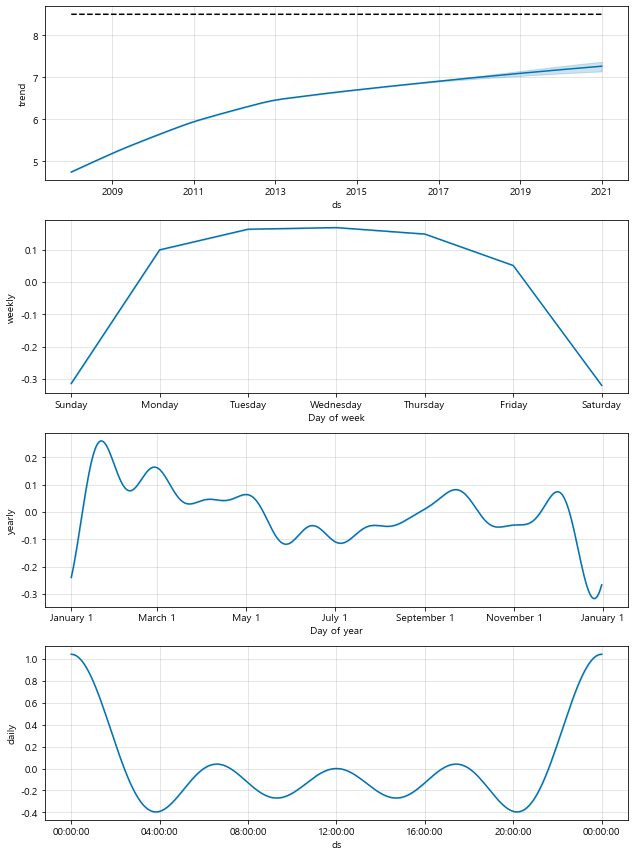

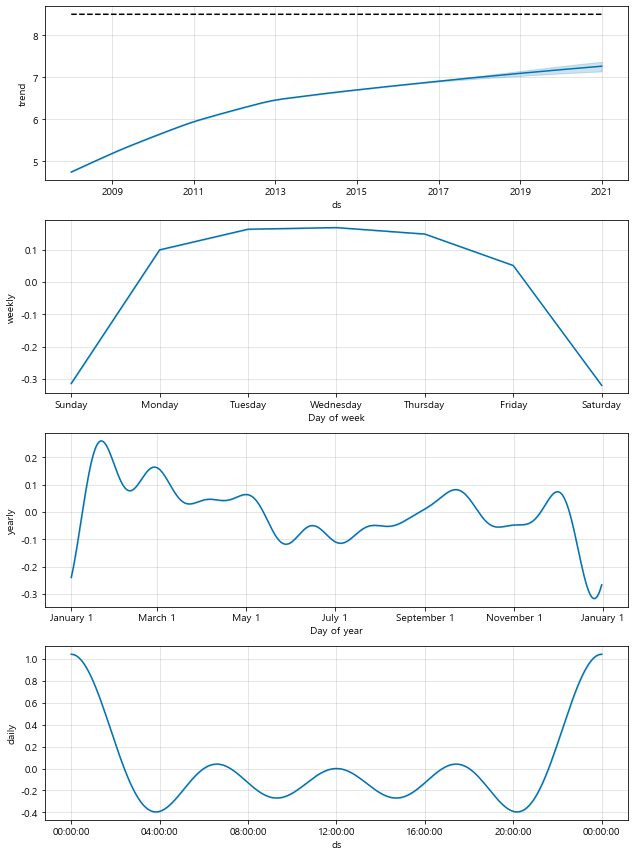

In [56]:
forecast = m.predict(future)
m.plot_components(forecast)

- holiday

In [57]:
df = pd.read_csv("08. example_wp_peyton_manning.csv")
df['y'] = np.log(df['y'])
m = Prophet(daily_seasonality =True)
m.fit(df)
future = m.make_future_dataframe(periods=366)

In [58]:
df['y'] = np.log(df['y'])
m = Prophet(daily_seasonality=True)
m.fit(df)
future = m.make_future_dataframe(periods=366)

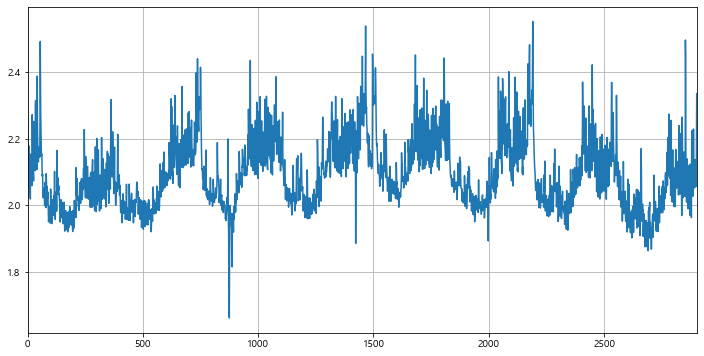

In [59]:
df.y.plot(figsize=(12,6), grid=True)

In [60]:
playoffs = pd.DataFrame({
    'holiday' : 'playoff',
    'ds' : pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                          '2010-01-24', '2010-02-07', '2011-01-08',
                          '2013-01-12', '2014-01-12', '2014-01-19',
                          '2014-02-02', '2015-01-11', '2016-01-17',
                          '2016-01-24', '2016-02-07']),
    'lower_window' : 0,
    'upper_window' : 1,
})

superbowls = pd.DataFrame({
    'holiday' : 'superbowl',
    'ds' : pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
    'lower_window' : 0,
    'upper_window' : 1,
})
holidays = pd.concat((playoffs, superbowls))

In [61]:
m = Prophet(holidays = holidays, daily_seasonality = True)
forecast = m.fit(df).predict(future)

In [62]:
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0 ][
    ['ds','playoff','superbowl']][-10:]

,ds,playoff,superbowl
2190,2014-02-02,0.133032,0.109121
2191,2014-02-03,0.193059,0.111133
2532,2015-01-11,0.133032,0.000000
2533,2015-01-12,0.193059,0.000000
2901,2016-01-17,0.133032,0.000000
2902,2016-01-18,0.193059,0.000000
2908,2016-01-24,0.133032,0.000000
2909,2016-01-25,0.193059,0.000000
2922,2016-02-07,0.133032,0.109121
2923,2016-02-08,0.193059,0.111133


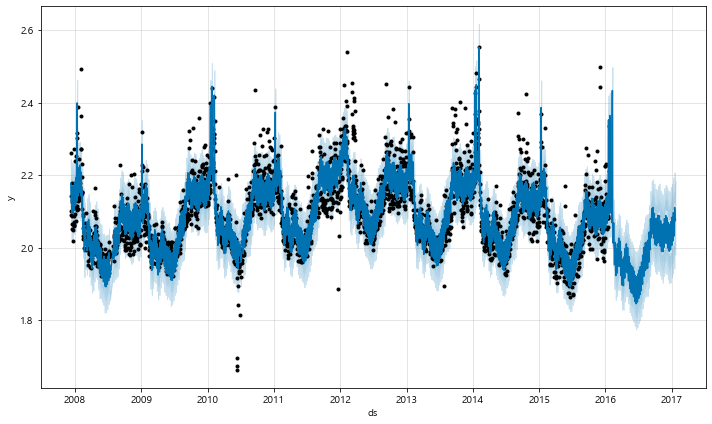

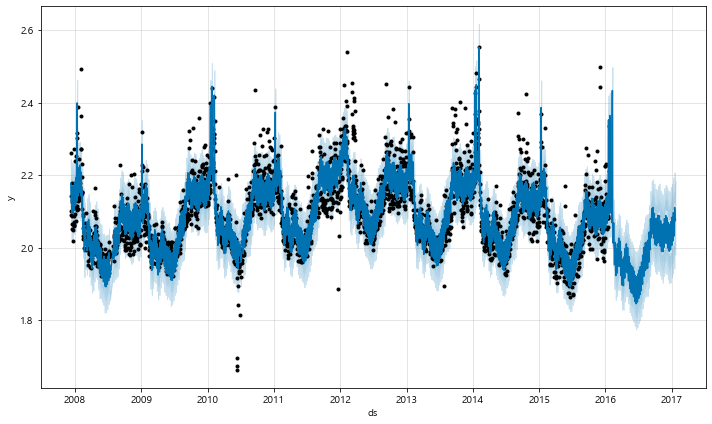

In [63]:
m.plot(forecast)

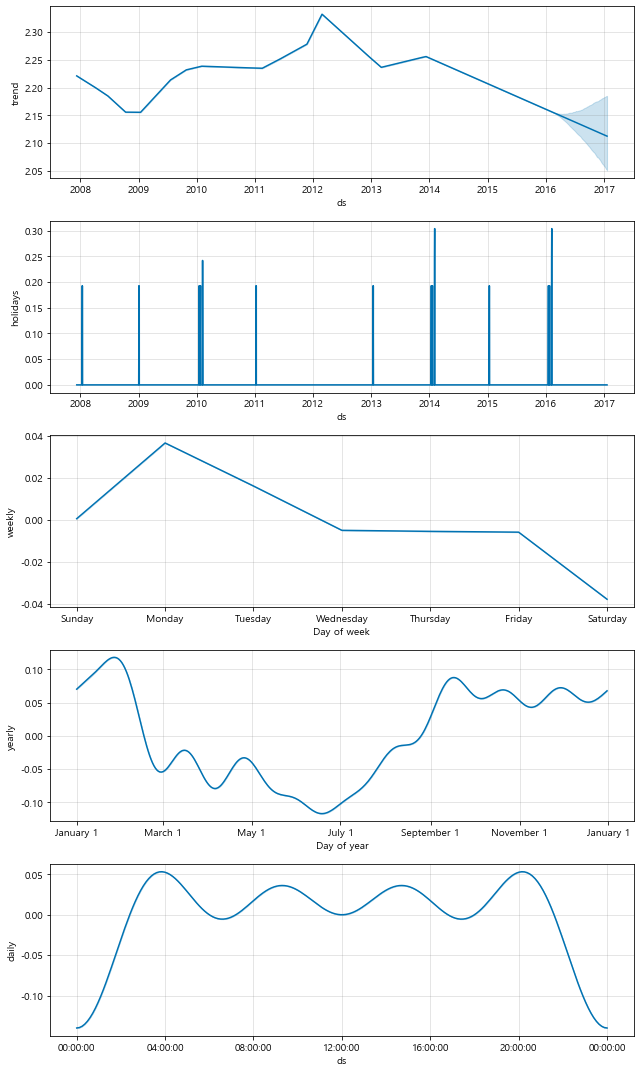

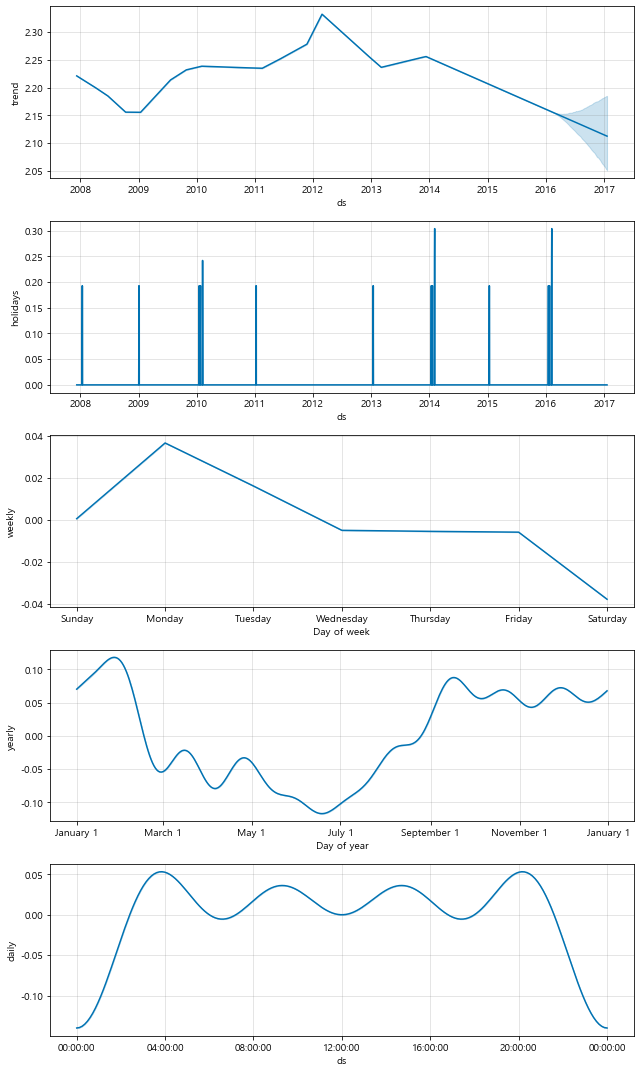

In [64]:
m.plot_components(forecast)